# Проверка гипотез по увеличению выручки в интернет-магазине

## Данные и Задачи

### Описание данных

Файл */datasets/hypothesis.csv*  
Hypothesis — краткое описание гипотезы;  
Reach — охват пользователей по 10-балльной шкале;  
Impact — влияние на пользователей по 10-балльной шкале;  
Confidence — уверенность в гипотезе по 10-балльной шкале;  
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  
  
Файл */datasets/orders.csv*  
transactionId — идентификатор заказа;  
visitorId — идентификатор пользователя, совершившего заказ;  
date — дата, когда был совершён заказ;  
revenue — выручка заказа;  
group — группа A/B-теста, в которую попал заказ.  
  
Файл */datasets/visitors.csv*    
date — дата;  
group — группа A/B-теста;  
visitors — количество пользователей в указанную дату в указанной группе A/B-теста  

### Задачи проекта

**Приоритизация гипотез по проекту.**  
Есть 9 гипотез по увеличению выручки интернет-магазина.  
Применить фреймворки для приоритизации гипотез.     

**Проанализировать A/B-тест:**  
Проанализировать тест.  
Принять решение по результатам теста и объясните его. Варианты решений:  
1. Остановить тест, зафиксировать победу одной из групп.  
2. Остановить тест, зафиксировать отсутствие различий между группами.  
3. Продолжить тест.  

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mth
import datetime as dt
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 130

In [2]:
hypo = pd.read_csv('/datasets/hypothesis.csv', sep=',')
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

In [3]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [4]:
badseedid = orders[['visitorId','group']].groupby('visitorId', as_index = False).agg({'group':'nunique'})
badseedid = badseedid[badseedid['group'] == 2][['visitorId']]
orders = orders[np.logical_not(orders['visitorId'].isin(badseedid['visitorId']))]
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


В заказах оказались пользователи, которые относились сразу к двум группам, убрали сих господ из теста польностью

In [5]:
visitors
visitorsA = visitors[visitors['group'] == 'A']
visitorsB = visitors[visitors['group'] == 'B']
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [8]:
orders.duplicated().sum()

0

In [9]:
visitors.duplicated().sum()

0

##  Приоритизация гипотез

Применить фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.  
Применить фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.  
Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE.   

In [10]:
hypo.columns = ['hypothesis','reach','impact','confidence','efforts']
hypo['ICE'] =  hypo['impact'] * hypo['confidence'] / hypo['efforts']
hypo['RICE'] = hypo['reach'] * hypo['impact'] * hypo['confidence'] / hypo['efforts']
hypo


,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


In [11]:
display(hypo[['hypothesis','ICE']].sort_values(by = 'ICE',ascending = False).head(3))
display(hypo[['hypothesis','RICE']].sort_values(by = 'RICE',ascending = False).head(3))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000


,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0


REACH имеет сильное влияние на методику RICE, по этому ожидаемо верхние позиции занимают гипотезы с высоким REACH

## Анализ A/B-теста

In [12]:
dategroups = orders[['date','group']].drop_duplicates().sort_values(by='date').reset_index(drop=True)

orderagg = dategroups.apply(
    lambda x: orders[
        np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])
                    ].agg({ 
                            'date':'max',
                            'group': 'max',
                            'transactionId': 'nunique',
                            'visitorId': 'nunique',
                            'revenue':'sum'
                           }),
                           axis = 1)

visitorsagg = dategroups.apply(
    lambda x: visitors[
        np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])
                    ].agg({ 
                            'date':'max',
                            'group': 'max',
                            'visitors':'sum'
                           }),
                           axis = 1)
aggdate = orderagg.merge(visitorsagg, left_on = ['date','group'], right_on = ['date','group'])
aggdate.columns = ['date','group','orders','buyers','revenue','visitors']
aggdate['conversion'] = aggdate['orders'] / aggdate['visitors']
aggdateA = aggdate[aggdate['group'] == 'A']
aggdateB = aggdate[aggdate['group'] == 'B']
aggdate.head(10)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.031390
3,2019-08-02,B,40,39,221801,1294,0.030912
4,2019-08-03,B,54,53,288850,1803,0.029950
5,2019-08-03,A,66,60,346854,1845,0.035772
6,2019-08-04,B,68,66,385740,2573,0.026428
7,2019-08-04,A,77,71,388030,2562,0.030055
8,2019-08-05,B,89,87,475648,3280,0.027134
9,2019-08-05,A,99,92,474413,3318,0.029837


**Построить график кумулятивной выручки по группам**

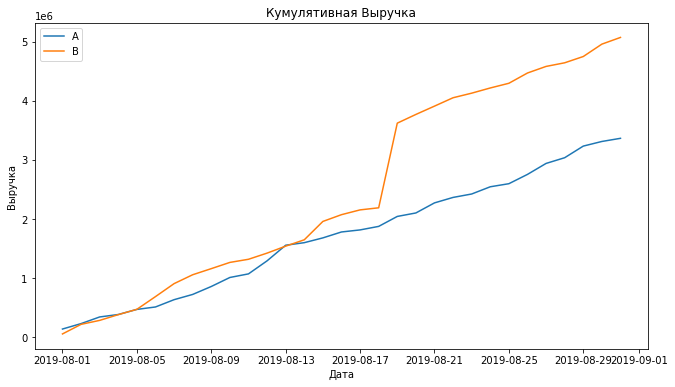

In [13]:
plt.rcParams ['figure.figsize'] = [11, 6]
plt.plot(aggdateA['date'], aggdateA['revenue'], label = 'A')
plt.plot(aggdateB['date'], aggdateB['revenue'], label = 'B')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивная Выручка')
plt.legend()
plt.show()


Выручка B-группы по всей продолжительности теста больше, чем у А-группы. Однако в середине теста виден сильный рост, который похож на выброс. Скорее всего совершен это крупный заказ в группе В.

**Построить график кумулятивного среднего чека по группам**

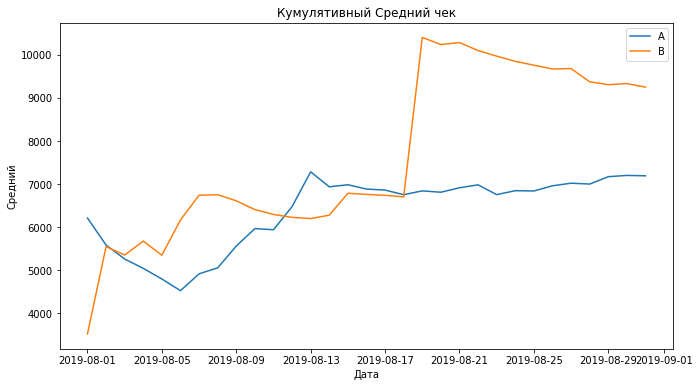

In [14]:
plt.plot(aggdateA['date'], aggdateA['revenue']/aggdateA['orders'], label = 'A')
plt.plot(aggdateB['date'], aggdateB['revenue']/aggdateB['orders'], label = 'B')
plt.xlabel('Дата')
plt.ylabel('Средний')
plt.title('Кумулятивный Средний чек')
plt.legend()
plt.show()

средний чек сильно "скачет" во время теста, успокаивается к концу теста, но так же виден сильный выброс.  
средний чек по группе В имеет тендецию к снижению. Скорее всего совершен это крупный заказ в группе В.

**Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения**

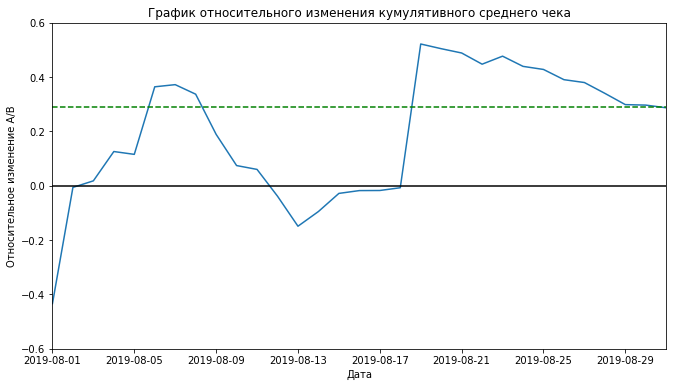

In [15]:
aggmeancost = aggdateA[['date','revenue','orders']].merge(aggdateB[['date','revenue','orders']], left_on = 'date', right_on = 'date', suffixes = ['A','B'] )
plt.plot(aggmeancost['date'], (aggmeancost['revenueB'] / aggmeancost['ordersB']) / (aggmeancost['revenueA'] / aggmeancost['ordersA']) -1)
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.axhline(y = 0.29, color = 'green', linestyle = '--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.6 , 0.6])
plt.xlabel('Дата')
plt.ylabel('Относительное изменение A/B')
plt.title('График относительного изменения кумулятивного среднего чека')
plt.show()

снова видны "скачки", нужно смотреть выбросы

**Построить график кумулятивного среднего количества заказов на посетителя по группам**

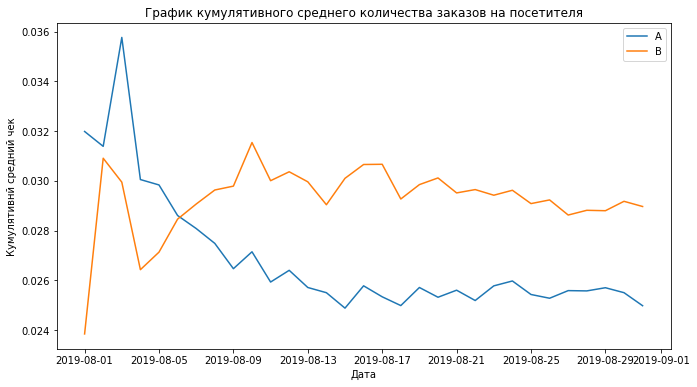

In [16]:
plt.plot(aggdateA['date'], aggdateA['conversion'], label = 'A')
plt.plot(aggdateB['date'], aggdateB['conversion'], label = 'B')
plt.xlabel('Дата')
plt.ylabel('Кумулятивнй средний чек')
plt.title('График кумулятивного среднего количества заказов на посетителя')
plt.legend()
plt.show()

Конверсии установились к концу теста.
Конверсия группы B значительно выше.

**Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A**

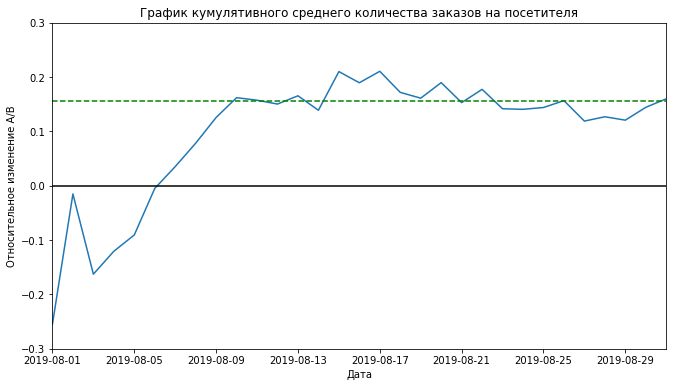

In [17]:
aggorders_per_visitor = aggdateA[['date','conversion']].merge(aggdateB[['date','conversion']], left_on = 'date', right_on = 'date', suffixes = ['A','B'] )
plt.plot(aggorders_per_visitor['date'], aggorders_per_visitor['conversionB']/aggorders_per_visitor['conversionA'] -1)
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.axhline(y = 0.155, color = 'green', linestyle = '--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.3 , 0.3])
plt.xlabel('Дата')
plt.ylabel('Относительное изменение A/B')
plt.title('График кумулятивного среднего количества заказов на посетителя')
plt.show()

Соотношение конверсий похоже установилось на одном уровне

**Построить точечный график количества заказов по пользователям**

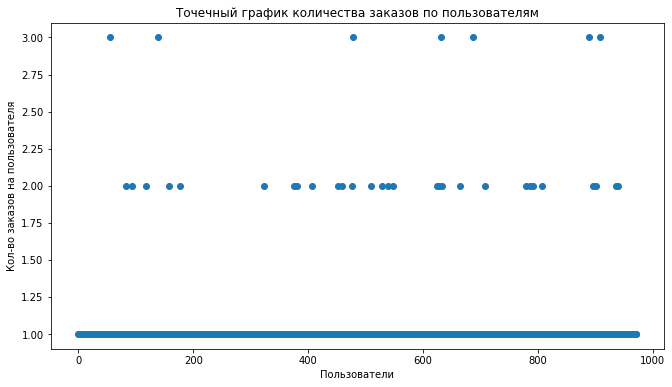

In [18]:
order_by_user = orders.groupby('visitorId', as_index = False).agg({'transactionId':'nunique'})
order_by_user.columns = ['userid','orders']
x_values = pd.Series(range(0,len(order_by_user['orders'])))
plt.scatter(x_values, order_by_user['orders'])
plt.xlabel('Пользователи')
plt.ylabel('Кол-во заказов на пользователя')
plt.title('Точечный график количества заказов по пользователям')
plt.show()

среднее кол-во заказов на пользователя в основном 1-2, выбросов нет, 3 заказа делают очень редко

**Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей. Построить точечный график стоимостей заказов**

In [19]:
np.percentile(order_by_user['orders'],[95,99])

array([1., 2.])

только 1% пользователей делает 2 и более заказов, аномалиями считаются все пользователи у кого 2 и более заказа

**Построить точечный график стоимостей заказов**

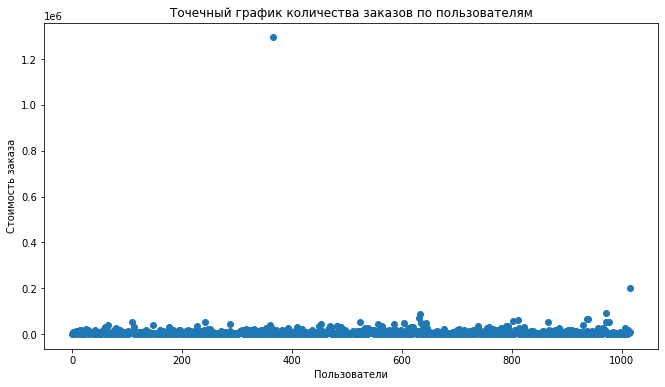

In [20]:
x_values = pd.Series(range(0,len(orders['transactionId'])))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')
plt.title('Точечный график количества заказов по пользователям')
plt.show()

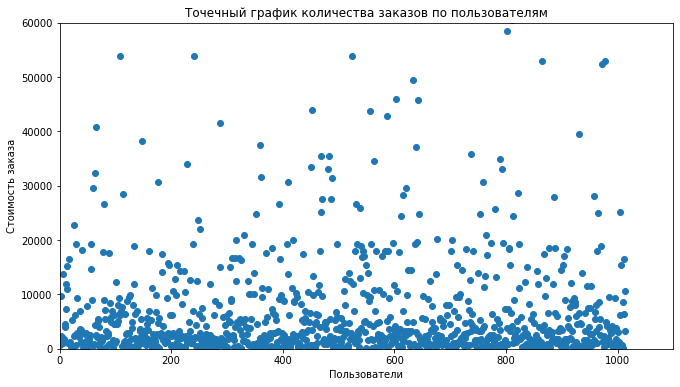

In [21]:
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1100, 0 , 60000])
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')
plt.title('Точечный график количества заказов по пользователям')
plt.show()

Есть один очень дорогой заказ, нужно смотреть точнее, чтобы сказать что-то конкретнее

**Посчитать 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.**

In [22]:
np.percentile(orders['revenue'],[95,99])

array([26785., 53904.])

только 1% пользователей заказывает больше 53904, ограничим верхнюю планку цены заказа суммой в 40 тыс.

**Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным**

In [23]:
order_by_userA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
order_by_userA.columns = ['userid', 'orders']

order_by_userB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
order_by_userB.columns = ['userid', 'orders'] 

sampleA = pd.concat([order_by_userA['orders'],pd.Series(0, index=np.arange(visitorsA['visitors'].sum() - len(order_by_userA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([order_by_userB['orders'],pd.Series(0, index=np.arange(visitorsB['visitors'].sum() - len(order_by_userB['orders'])), name='orders')],axis=0) 

print('p-value')
print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print()
print('Относительная разница B/A')
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value
0.011

Относительная разница B/A
0.160


In [24]:
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18736, dtype: int64

Нулевая гипотеза: Статистических различий между группами нет.  
Алтерантивная гипотеза: Статистические различия между группами есть.

p-value меньше 5%, значит нулевую гипотезу - отвергаем, статистические различия между группами есть.
у группы B на 15% лучше конверсия, но делать вывод по этим данным нельзя

**Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным**

In [25]:
print('p-value')
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print()
print('Относительная разница B/A')
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value
0.829

Относительная разница B/A
0.287


Нулевая гипотеза: Статистических различий между группами нет.  
Алтерантивная гипотеза: Статистические различия между группами есть.

p-value значительно больше 5%, значит различий - нет, группа B выигрывает по среднему чеку со значительным преимуществом 28%

**Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным**

In [26]:
user_many_order = order_by_user[order_by_user['orders'] > 1][['userid']]
user_with_cost = orders[orders['revenue'] > 40000][['visitorId']].drop_duplicates()
user_with_cost.columns = ['userid']
anomal_user = pd.concat([user_many_order, user_with_cost],axis = 0).drop_duplicates()

sampleA_filt = pd.concat([order_by_userA[np.logical_not(order_by_userA['userid'].isin(anomal_user['userid']))]['orders'], pd.Series(0, index=np.arange(visitorsA['visitors'].sum() - len(order_by_userA['orders'])), name='orders')],axis=0)
sampleB_filt = pd.concat([order_by_userB[np.logical_not(order_by_userB['userid'].isin(anomal_user['userid']))]['orders'], pd.Series(0, index=np.arange(visitorsB['visitors'].sum() - len(order_by_userB['orders'])), name='orders')],axis=0)

print('p-value')
print("{0:.3f}".format(st.mannwhitneyu(sampleA_filt, sampleB_filt)[1]))
print()
print('Относительная разница B/A')
print("{0:.3f}".format(sampleB_filt.mean() / sampleA_filt.mean() - 1))

p-value
0.006

Относительная разница B/A
0.198


Все еще отвергаем Нулевую гипотезу, статистические различия в группах есть.  
После удаления аномалий статистическое различие конверсии выросло, делать выводы по этим данным нельзя.

**Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным**

In [27]:
print('p-value')
print('{0:.3f}'.format(st.mannwhitneyu(orders[np.logical_and(orders['group']=='A' , np.logical_not(orders['visitorId'].isin(anomal_user['userid'])))]['revenue'], orders[np.logical_and(orders['group']=='B' , np.logical_not(orders['visitorId'].isin(anomal_user['userid'])))]['revenue'])[1]))
print()
print('Относительная разница B/A')
print('{0:.3f}'.format(orders[np.logical_and(orders['group']=='B' , np.logical_not(orders['visitorId'].isin(anomal_user['userid'])))]['revenue'].mean()/orders[np.logical_and(orders['group']=='A' , np.logical_not(orders['visitorId'].isin(anomal_user['userid'])))]['revenue'].mean()-1)) 

p-value
0.837

Относительная разница B/A
0.076


Не отвергаем нулевую гипотез - Статистических различий нет  
После очистки статистические различия сгладились еще сильнее по среднему чеку  
однако разница между группами уменьшилась до 7,5% (было значительно больше 28,7%)

## Общие выводы

### Данные

Данные в хорошем виде, дубилкатов не было, пришлось изменить формат даты.
Обнаружились покупатели, которые вошли сразу в обе контрольные группы - убрали их из теста.

### Гипотезы

Рассмотрели приоритеты гипотез 2 методиками

### Анализ A/B теста

В проекте не указано какую именно гипотезу мы проверяем и на что, так что вывод делать выходит странновато.  
В данных почти сразу же заметны аномальные показатели, как по кол-ву заказов на покупателя, так и по общей сумме заказа.  
  
кумулятивная выручка растет у обоих групп, показатель хороший, но о многом не говорит. 
  
конверсии похоже установились.
как по очищенным так и по сырым данным группа B - выигрывает в конверсии с большим отрывом.

средний чек похоже установился.
По текущим данным очищенным данным группа B - выигрывает на 7,5%, однако стоит отменить, что средний чек группы В падает, а группы А продолжает расти.

Считаю что тест можно завершить и объявить, что группа В лучше группы А.
Разница в конверсии почти 20% и 7,5% в среднем чеке слишком высокая, что группа А как-то смогла ее компенсировать, хоть и данные по конверсии статистически различны
